# Tugas Kecil 2
### Eksplorasi Scikit-Learn pada Jupyter Notebook

Dion Saputra 1351645 <br>
Rabbi Fijar Mayoza 13516081

Import necessary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from subprocess import call
from IPython.display import Image

Define helper function

In [13]:
def show_model_visualization(target,hypotesis):
    visualise_df = pd.DataFrame({'target': target,'hypotesis': hypotesis})
    lines = visualise_df.plot.line()

# show correct prediction percentage
def show_prediction_percentage(feature,label,prediction):
    print("Number of correct prediction from %d data is: %d" 
      %(feature.shape[0], (label == y_predict).sum()))
    
# show performance
def show_performance(y_test, y_predict):
    print('Accuracy score: ',round(accuracy_score(y_test, y_predict),2))
    print('Precision score: ',round(precision_score(y_test,y_predict,average="micro"),2))
    print('Recall score: ',round(precision_score(y_test,y_predict,average="micro"),2))

# show confusion matrix
def conf_matrix(y_test, y_predict):
    y_actu = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_predict, name='Predicted')
    return pd.crosstab(y_actu, y_pred)

### A. Load Dataset 

#### A.1 Load Dataset Iris 

In [3]:
def load_dataset_iris():
    # load iris dataset from standar scikit dataset
    return datasets.load_iris()

def build_dataframe_iris(iris):
    # save feature values in pandas dataframe
    iris_feature_df = pd.DataFrame(iris.data)
    iris_feature_df.columns = iris.feature_names

    # save label values in pandas dataframe
    iris_target_df = pd.DataFrame(iris.target);
    iris_target_df.columns = ['target']
    map_target = pd.Series(iris.target_names, index=[0,1,2]);
    iris_target_df['target'] = iris_target_df['target'].map(map_target)

    # concat feature dataframe and label dataframe
    iris_df = pd.concat([iris_feature_df, iris_target_df], axis=1)
    
    return iris_df

# load dataset iris
iris = load_dataset_iris()

# show dataframe iris
iris_df = build_dataframe_iris(iris)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### A.2 Load Dataset Play-Tennis 

In [4]:
# load play-tennis dataset from external csv using pandas
def build_dataframe_tennis(tennis_file):
    tennis_df = pd.read_csv(tennis_file);
    return tennis_df

# show tennis dataframe
tennis_file = "weather.nominal.csv"
tennis_df = build_dataframe_tennis(tennis_file)
tennis_df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### B. Full-Train Learning
<b>Full-train learning</b> merupakan metode learning dengan menggunakan keseluruhan data pada dataset sebagai data training.

#### B.1 Naive Bayes
Pada scikit-learn terdapat 4 jenis pendekatan untuk Naive Bayes, yaitu: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, dan Bernoulli Naive Bayes. Training di bawah ini dilakukan untuk salah satu algoritma yang dipilih yaitu Gaussian Naive Bayes

In [5]:
# gaussian naive bayes model for iris data
gnb_ft_model = GaussianNB().fit(iris.data,iris.target)
y_predict = gnb_ft_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 144


#### B.2 Decision Trees ID3

In [6]:
# decision trees id3 model for iris data
dt_ft_model = tree.DecisionTreeClassifier(criterion="entropy").fit(iris.data,iris.target)
y_predict = dt_ft_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 150


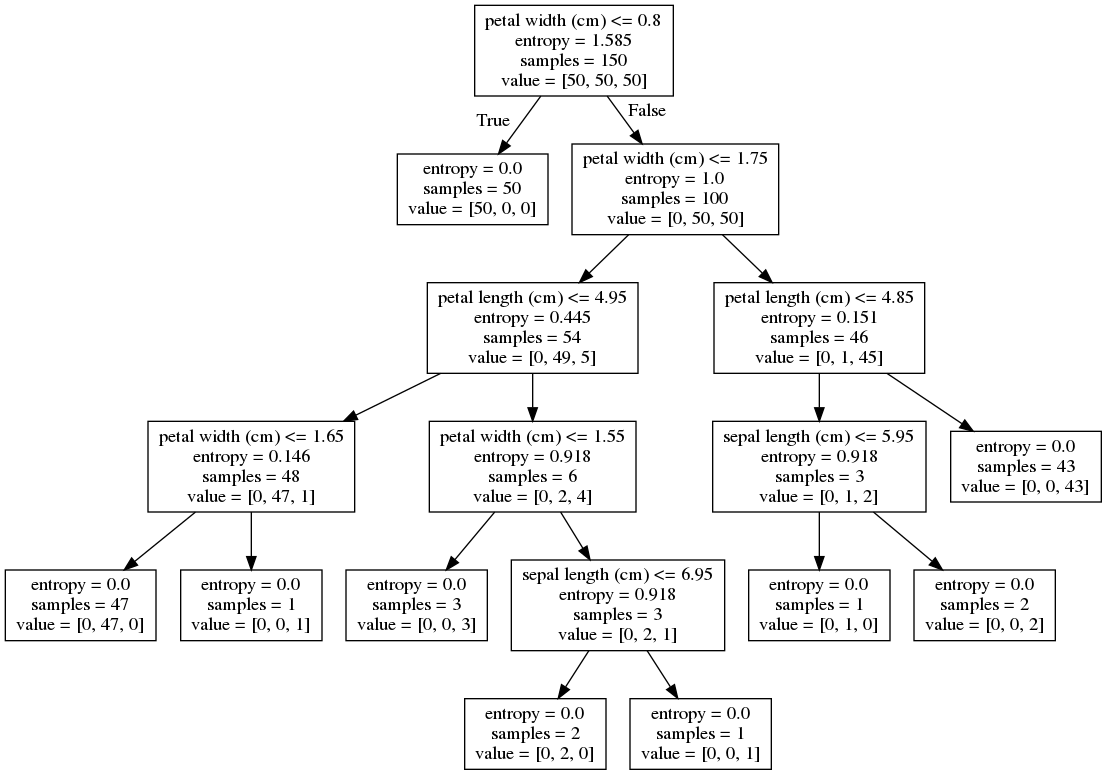

In [7]:
tree.export_graphviz(dt_ft_model, out_file='dt_ft_model.dot', feature_names=iris.feature_names)
call(['dot', '-T', 'png', 'dt_ft_model.dot', '-o', 'dt_ft_model.png'])
Image("dt_ft_model.png")

#### B.3 K-Nearest Neighboard (KNN)

In [8]:
knn_ft = KNeighborsClassifier(n_neighbors=3).fit(iris.data,iris.target)
y_predict = knn_ft.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 144


#### B.4 Multilayer Perceptron (MLP)

In [9]:
mlp_ft_model = MLPClassifier(solver='lbfgs',alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1).fit(iris.data,iris.target)
y_predict = mlp_ft_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 148


### C. Split-Train Learning
<b>Split-train learning</b> merupakan metode learning dengan membagi dataset menjadi dua bagian, yaitu data training dan data test. Pada training berikut dataset akan dibagi menjadi 90% data training dan 10% data test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

#### C.1 Naive Bayes

In [26]:
# gaussian naive bayes model for iris data
gnb_st_model = GaussianNB().fit(X_train,y_train)
y_predict = gnb_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.93
Precision score:  0.93
Recall score:  0.93


Predicted,0,1,2
Actual,,,
0,4,0,0
1,0,5,0
2,0,1,5


#### C.2 Decision Trees ID3 

In [27]:
# decision trees id3 model for iris data
dt_st_model = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
y_predict = dt_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.87
Precision score:  0.87
Recall score:  0.87


Predicted,0,1,2
Actual,,,
0,4,0,0
1,0,5,0
2,0,2,4


#### C.3 K-Nearest Neighboard 

In [28]:
knn_st = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_predict = knn_st.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.93
Precision score:  0.93
Recall score:  0.93


Predicted,0,1,2
Actual,,,
0,4,0,0
1,0,5,0
2,0,1,5


#### C.4 Multilayer Perceptron (MLP)

In [29]:
mlp_st_model = MLPClassifier(solver='lbfgs',alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train,y_train)
y_predict = mlp_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.87
Precision score:  0.87
Recall score:  0.87


Predicted,0,1,2
Actual,,,
0,4,0,0
1,0,5,0
2,0,2,4
